<a href="https://colab.research.google.com/github/HinnHabib/Prediction-of-Product-Sales/blob/main/Prediction_of_Product_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Title: Prediction of Product Sales
  - Author: Habib Hinn

## Project Overview




Data Dictionary:
|     |     |
| --- | --- |
| **Variable Name** | **Description** |
| Item\_Identifier | Product ID |
| Item\_Weight | Weight of product |
| Item\_Fat\_Content | Whether the product is low-fat or regular |
| Item\_Visibility | The percentage of total display area of all products in a store allocated to the particular product |
| Item\_Type | The category to which the product belongs |
| Item\_MRP | Maximum Retail Price (list price) of the product |
| Outlet\_Identifier | Store ID |
| Outlet\_Establishment\_Year | The year in which store was established |
| Outlet\_Size | The size of the store in terms of ground area covered |
| Outlet\_Location\_Type | The type of area in which the store is located |
| Outlet\_Type | Whether the outlet is a grocery store or some sort of supermarket |
| Item\_Outlet\_Sales | Sales of the product in the particular store. This is the target variable to be predicted|

## Load and Inspect Data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

In [3]:
file_path = '/content/drive/MyDrive/AXSOSACADEMY/01-Fundamentals/Week02/Data/sales_predictions_2023.csv'
df = pd.read_csv(file_path)

1) How many rows and columns?
  - Rows: 8523
  - Columns: 12

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [6]:
df.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


2) What are the datatypes of each variable?

In [7]:
df.dtypes

,0
Item_Identifier,object
Item_Weight,float64
Item_Fat_Content,object
Item_Visibility,float64
Item_Type,object
Item_MRP,float64
Outlet_Identifier,object
Outlet_Establishment_Year,int64
Outlet_Size,object
Outlet_Location_Type,object


## Clean Data

In [8]:
num_cols = df.select_dtypes(include='number').columns
for col in num_cols:
  print(f"Column Name: {col} \n")
  print(df[col].value_counts())
  print("\n")

Column Name: Item_Weight 

Item_Weight
12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
8.920      2
6.520      1
9.420      1
7.685      1
5.400      1
Name: count, Length: 415, dtype: int64


Column Name: Item_Visibility 

Item_Visibility
0.000000    526
0.076975      3
0.061271      2
0.046825      2
0.112399      2
           ... 
0.054142      1
0.018920      1
0.044974      1
0.103611      1
0.083060      1
Name: count, Length: 7880, dtype: int64


Column Name: Item_MRP 

Item_MRP
172.0422    7
170.5422    6
142.0154    6
109.5228    6
188.1872    6
           ..
108.7912    1
157.5972    1
245.2118    1
232.3326    1
39.6164     1
Name: count, Length: 5938, dtype: int64


Column Name: Outlet_Establishment_Year 

Outlet_Establishment_Year
1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: count, dtype: int64


Column Name: Item_Outlet_Sales 

Item_Outlet_Sales
958.7520     17
1342

In [9]:
col_object_types = df.select_dtypes(include='object').columns
print(col_object_types)
for col in col_object_types:
  print(f"Column Name: {col} \n")
  print(df[col].value_counts())
  print("\n")

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')
Column Name: Item_Identifier 

Item_Identifier
FDW13    10
FDG33    10
FDX31     9
FDT07     9
NCY18     9
         ..
FDO33     1
FDK57     1
FDT35     1
FDN52     1
FDE52     1
Name: count, Length: 1559, dtype: int64


Column Name: Item_Fat_Content 

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64


Column Name: Item_Type 

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Bre

3) Are there duplicates? If so, drop any duplicates.

In [10]:
duplicate_rows = df.duplicated(keep=False)
if duplicate_rows.sum() > 0:
  df = df.drop_duplicates()
else:
  print("No Duplicates")

No Duplicates


4) Identify missing values.

In [11]:
null_sums = df.isna().sum()
null_percent = null_sums/len(df) * 100
null_percent[null_percent>0].sort_values(ascending=False)

,0
Outlet_Size,28.276428
Item_Weight,17.165317


5) Address the missing values by using a placeholder value.

In [12]:
df['Outlet_Size'].head()
df['Outlet_Size'].value_counts(dropna=False)

,count
Outlet_Size,
Medium,2793
NaN,2410
Small,2388
High,932


In [13]:
df['Outlet_Size'] = df['Outlet_Size'].fillna('MISSING')
df['Outlet_Size'].value_counts(dropna=False)

,count
Outlet_Size,
Medium,2793
MISSING,2410
Small,2388
High,932


In [14]:
df['Item_Weight'].head()
df['Item_Weight'].value_counts(dropna=False)

,count
Item_Weight,
NaN,1463
12.150,86
17.600,82
13.650,77
11.800,76
...,...
5.210,2
9.420,1
7.685,1


In [15]:
null_items_weight = df['Item_Weight'].isna()
df[null_items_weight]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362
...,...,...,...,...,...,...,...,...,...,...,...,...
8485,DRK37,NaN,Low Fat,0.043792,Soft Drinks,189.0530,OUT027,1985,Medium,Tier 3,Supermarket Type3,6261.8490
8487,DRG13,NaN,Low Fat,0.037006,Soft Drinks,164.7526,OUT027,1985,Medium,Tier 3,Supermarket Type3,4111.3150
8488,NCN14,NaN,Low Fat,0.091473,Others,184.6608,OUT027,1985,Medium,Tier 3,Supermarket Type3,2756.4120
8490,FDU44,NaN,Regular,0.102296,Fruits and Vegetables,162.3552,OUT019,1985,Small,Tier 1,Grocery Store,487.3656


In [16]:
df_item_weight = df.groupby('Item_Type')['Item_Weight'].mean()
df_item_weight


,Item_Weight
Item_Type,
Baking Goods,12.277108
Breads,11.346936
Breakfast,12.768202
Canned,12.305705
Dairy,13.426069
Frozen Foods,12.867061
Fruits and Vegetables,13.224769
Hard Drinks,11.400328
Health and Hygiene,13.142314


In [17]:

df['Item_Weight'] = df['Item_Weight'].fillna(df['Item_Type'].map(df_item_weight))
df['Item_Weight'].isna().sum()

np.int64(0)

6) Confirm that there are no missing values after addressing them.

In [18]:
null_sums = df.isna().sum()
null_percent = null_sums/len(df) * 100
null_percent

,0
Item_Identifier,0.0
Item_Weight,0.0
Item_Fat_Content,0.0
Item_Visibility,0.0
Item_Type,0.0
Item_MRP,0.0
Outlet_Identifier,0.0
Outlet_Establishment_Year,0.0
Outlet_Size,0.0
Outlet_Location_Type,0.0


7) Find and fix any inconsistent categories of data (for example: fix cat, Cat, and cats so that they are consistent).

In [19]:
col_object_types = df.select_dtypes(include='object').columns
print(col_object_types)
for col in col_object_types:
  print(f"Column Name: {col} \n")
  print(df[col].value_counts())
  print("\n")

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')
Column Name: Item_Identifier 

Item_Identifier
FDW13    10
FDG33    10
FDX31     9
FDT07     9
NCY18     9
         ..
FDO33     1
FDK57     1
FDT35     1
FDN52     1
FDE52     1
Name: count, Length: 1559, dtype: int64


Column Name: Item_Fat_Content 

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64


Column Name: Item_Type 

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Bre

In [20]:
df['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,5089
Regular,2889
LF,316
reg,117
low fat,112


In [21]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF': 'Low Fat', 'low fat': 'Low Fat', 'reg': 'Regular'})
df['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,5517
Regular,3006


8) For any numerical columns, obtain the summary statistics of each (min, max, mean).

In [22]:
num_cols = df.select_dtypes(include='number').columns
df[num_cols].describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857890,0.066132,140.992782,1997.831867,2181.288914
std,4.232804,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.867061,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


## Exploratory Data Analysis

Import needed Libraries

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
df.dtypes

,0
Item_Identifier,object
Item_Weight,float64
Item_Fat_Content,object
Item_Visibility,float64
Item_Type,object
Item_MRP,float64
Outlet_Identifier,object
Outlet_Establishment_Year,int64
Outlet_Size,object
Outlet_Location_Type,object


In [25]:
sales_stats = df.describe()
sales_stats

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857890,0.066132,140.992782,1997.831867,2181.288914
std,4.232804,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.867061,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


### Histogram for Numerical values

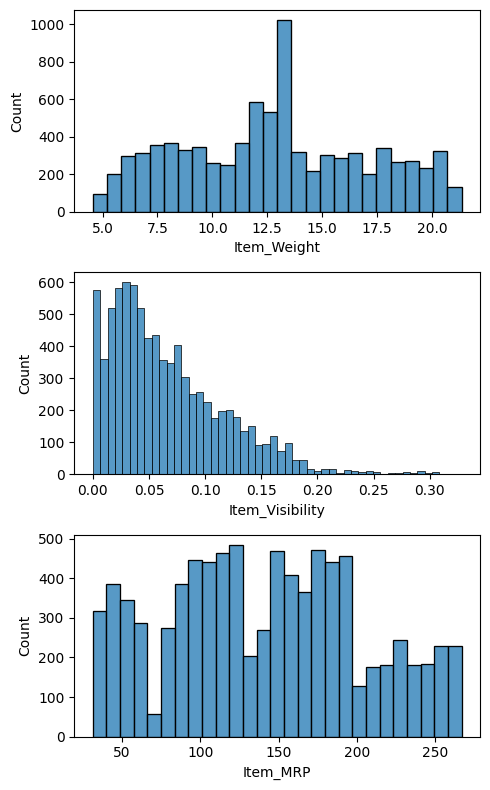

In [26]:
fig, ax = plt.subplots(figsize=(5, 8), nrows=3)
sns.histplot(data=df, x='Item_Weight', ax=ax[0])
sns.histplot(data=df, x='Item_Visibility', ax=ax[1])
sns.histplot(data=df, x='Item_MRP', ax=ax[2])

fig.tight_layout()


#### Historgram Findings:
Item Weight:
- Since most of the data where around missing and we replace it with mean for each - thats why majority of the data is around the mean
-

Item Visibility:
- Most of the item visibility is less than 0.75
- Very few items has visibility larger than 0.20

Item MRP:
- Distrubution doesn't follow the normal distrubution
- There is a drop in values between 130 and 140


### Boxplots to view statistical summaries of numerical features in your dataset.

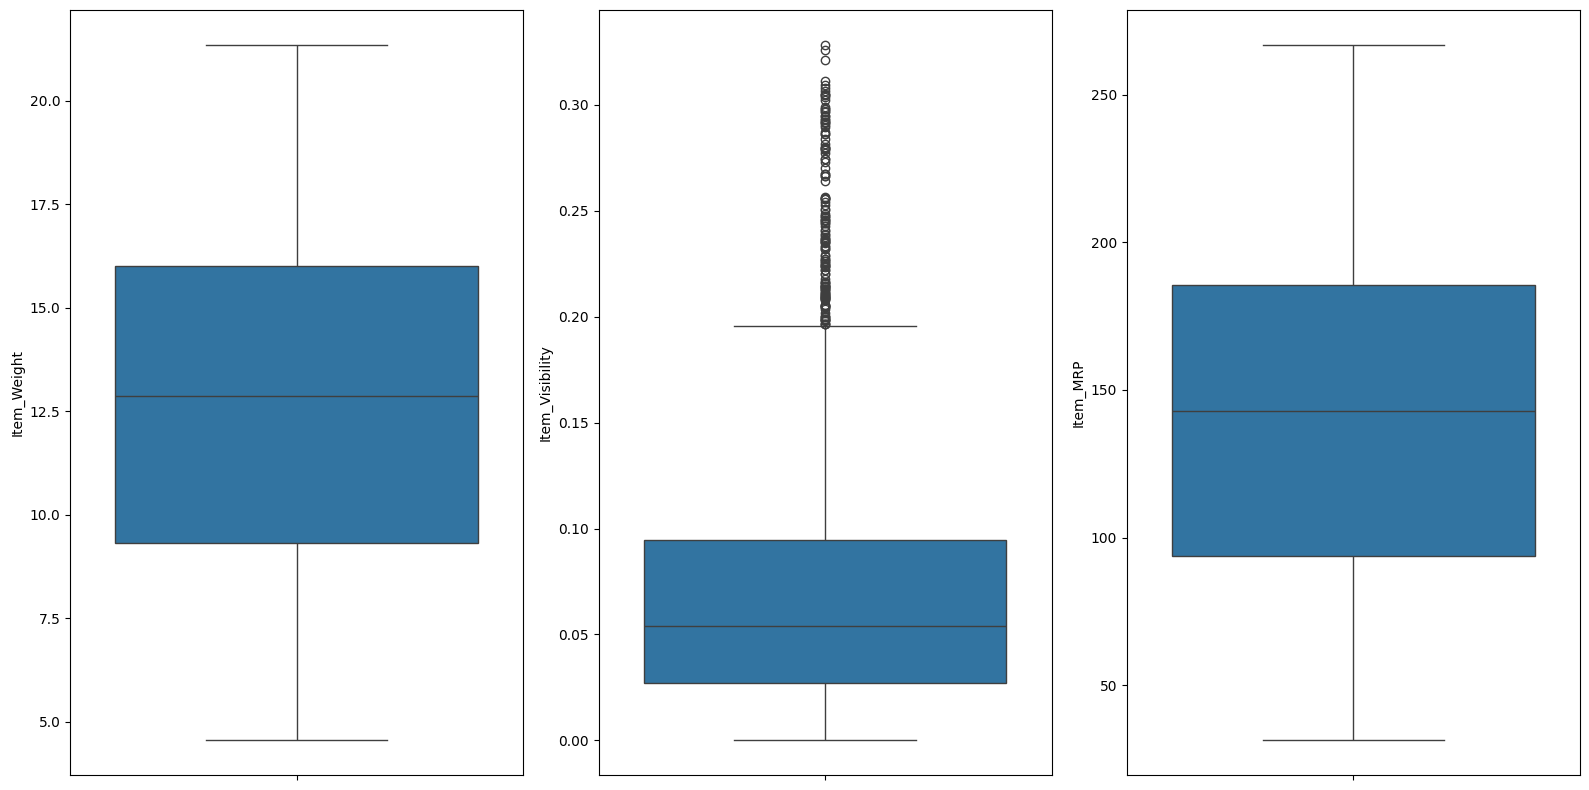

In [27]:
fig, ax = plt.subplots(figsize=(16, 8), ncols=3)
sns.boxplot(data=df, y='Item_Weight', ax=ax[0])
sns.boxplot(data=df, y='Item_Visibility', ax=ax[1])
sns.boxplot(data=df, y='Item_MRP', ax=ax[2])

fig.tight_layout()

#### Box Plot Findings:
Item Weight:
- No outliers
- Average is 13

Item Visibility:
- Lot of Outliers
- Average above 0.05 with slight value.


Item MRP:
- No outliers
- Average below 150
- Min around 30\$
- Max around 280\$


#### Countplots to view the frequency of each class of categorial features

/tmp/ipython-input-1807187081.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45)


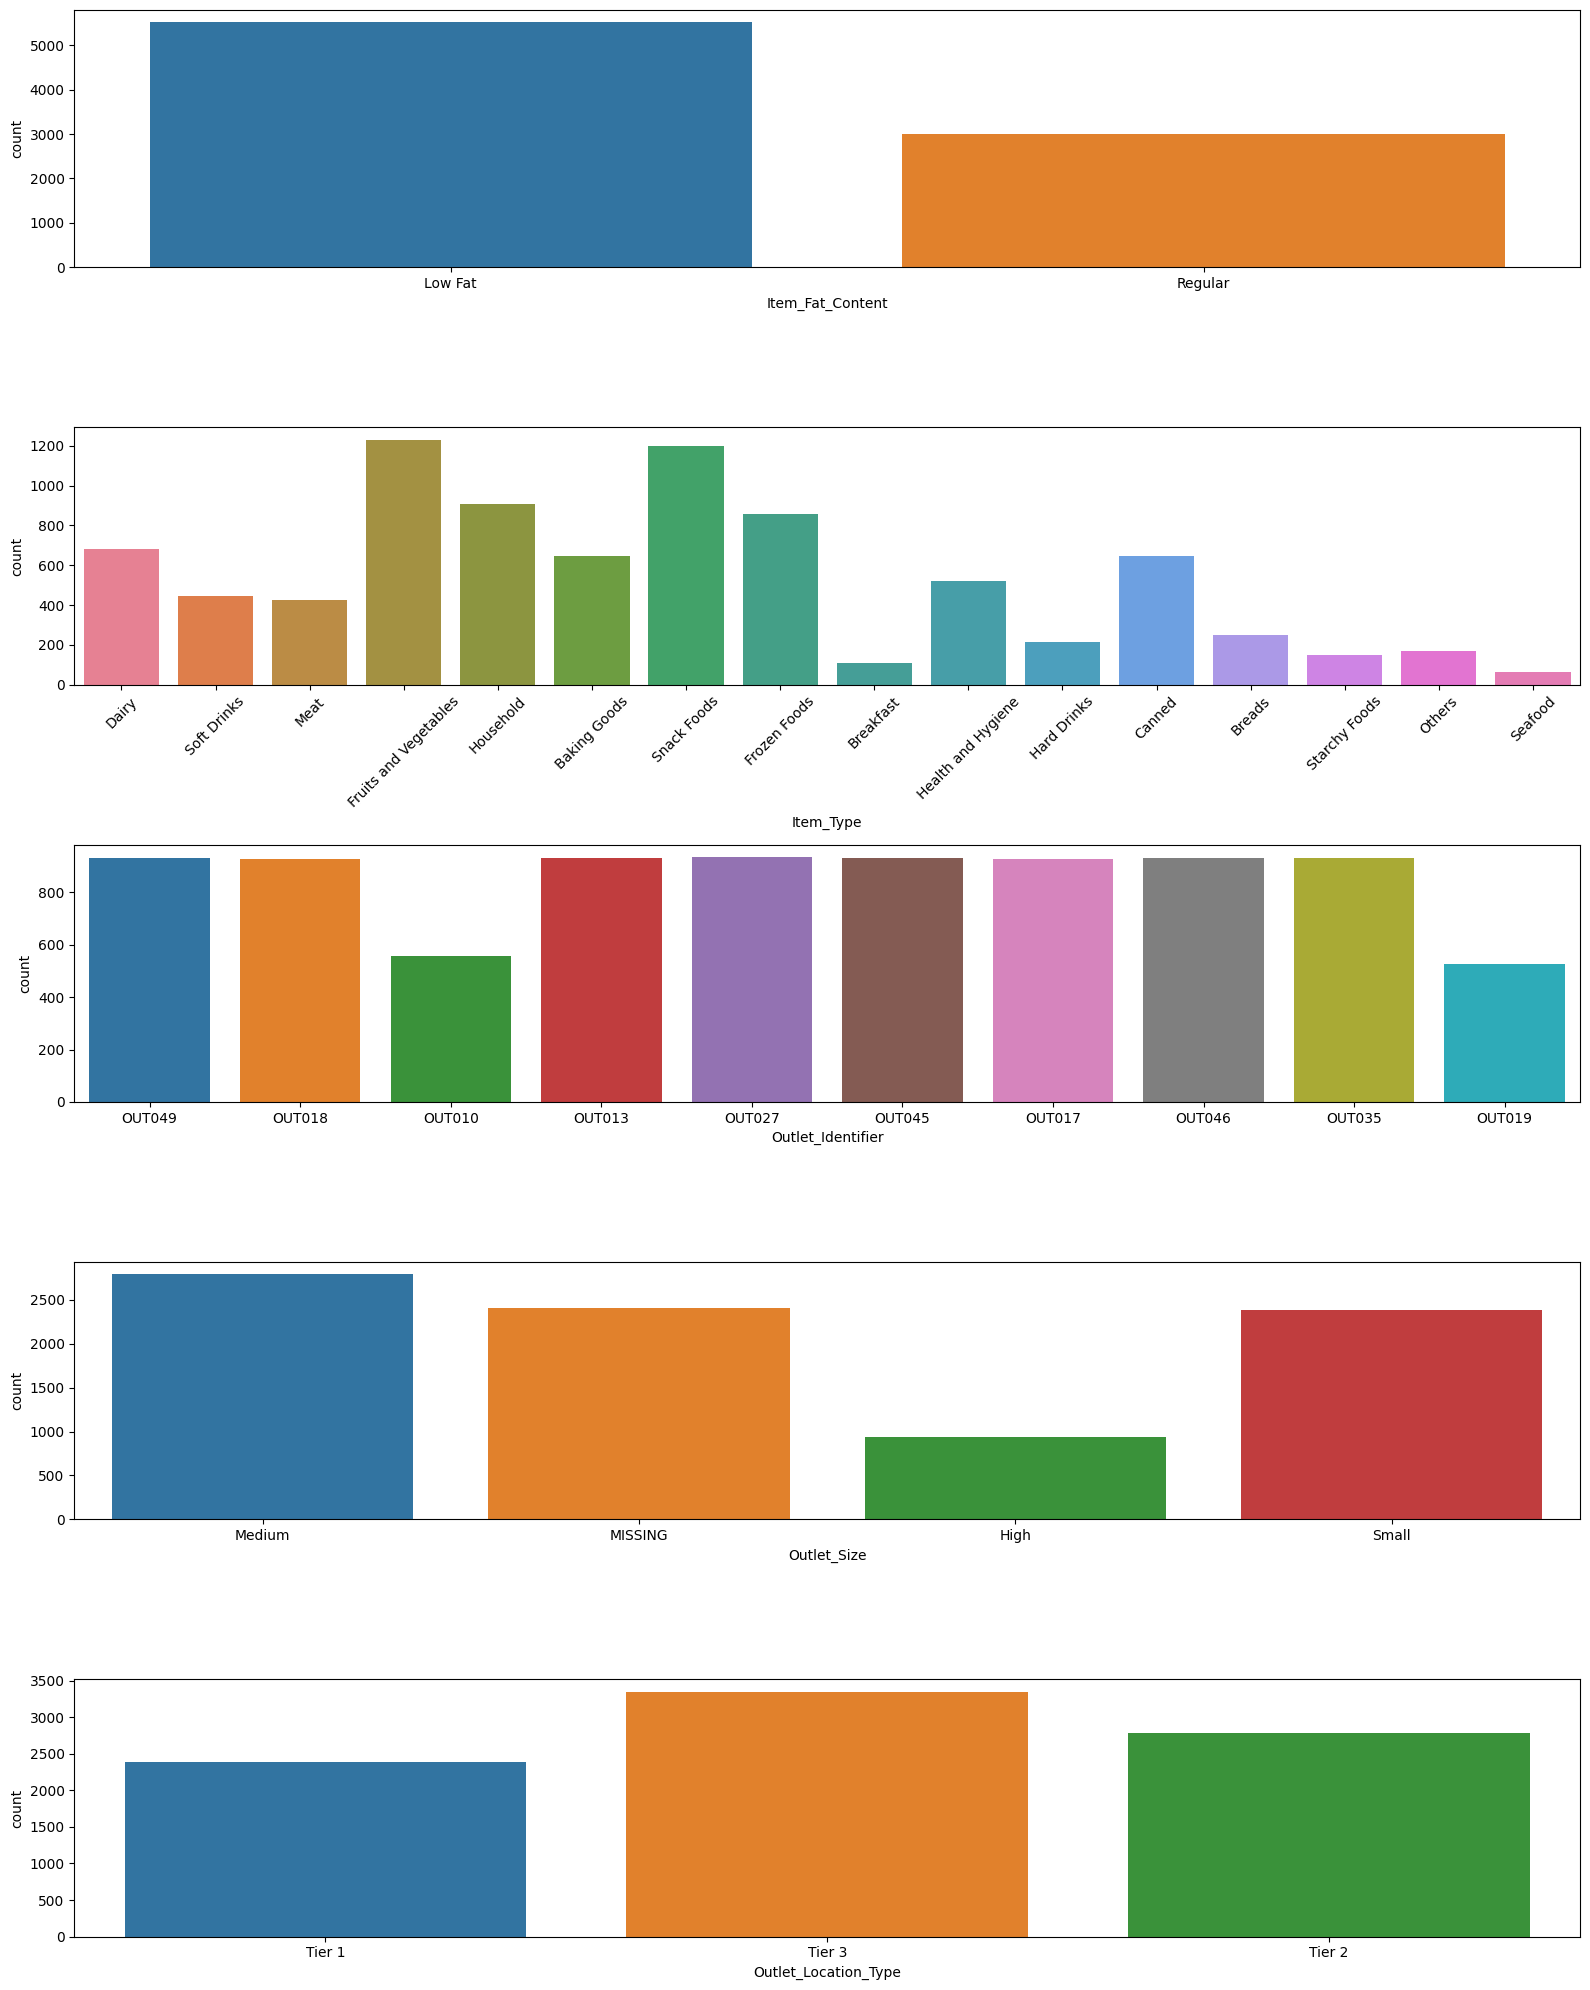

In [28]:
fig, ax = plt.subplots(figsize=(16, 20), nrows=5)
sns.countplot(data=df, x='Item_Fat_Content', ax=ax[0], hue='Item_Fat_Content' )
sns.countplot(data=df, x='Item_Type', ax=ax[1], hue='Item_Type')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45)
sns.countplot(data=df, x='Outlet_Identifier', ax=ax[2], hue='Outlet_Identifier')
sns.countplot(data=df, x='Outlet_Size', ax=ax[3], hue='Outlet_Size')
sns.countplot(data=df, x='Outlet_Location_Type', ax=ax[4], hue='Outlet_Location_Type')

fig.tight_layout()

#### Count Plot Findings:

Item Fat Content:
- Majority of items sold are law fat
- Law fat count is double the regulator

Item Type:
- Majority of items are fruits and vegetables and snack foods
- Very few breakfast and seafood items available


Outlet Identifier:
- Most of the Outlets have same values expect outlet OUT010 and OUT019

Outlet Size:
- Medium Sized Outlets has highest value
- Hig Sized Outlets has lowest value
- Missing Sized has almost same value as Small Sized Outlet


Outlet Location Type:
- Tier 3 has the highest value then Tier 1 then Tier 2

#### Heatmap to view the correlation between features.

In [29]:
corr = df.corr(numeric_only=True)
corr

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.011620,0.025821,-0.008376,0.012088
Item_Visibility,-0.011620,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.025821,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.008376,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.012088,-0.128625,0.567574,-0.049135,1.000000


<Axes: >

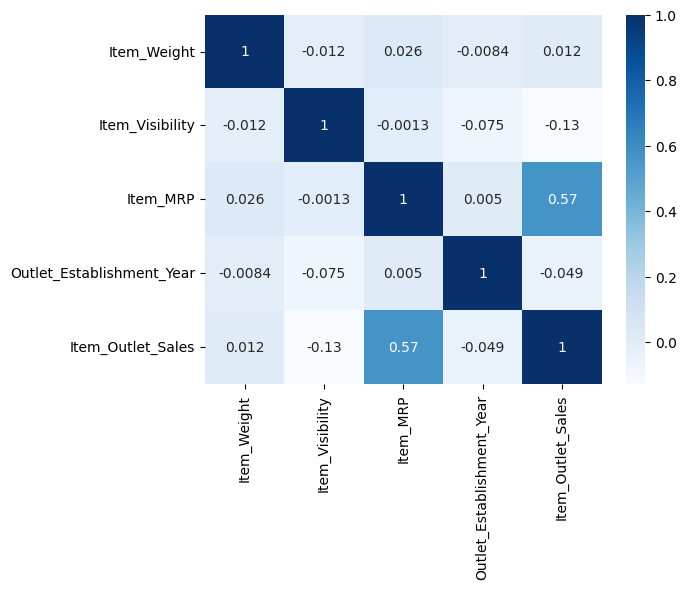

In [30]:
sns.heatmap(data=corr, annot=True, cmap = 'Blues')

Heatmap Findinds:
- There is a moderate positive correlation between Item MRP and item outlet sales (0.57)

## Feature Inspection